In [1]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize
from pymoo.algorithms.moo.nsga3 import ReferenceDirectionSurvival
from pymoode.algorithms import NSDER
from pymoode.algorithms import GDE3
from pymoode.survival import RankAndCrowding
from pymoo.factory import get_reference_directions

In [2]:
from pymoo.factory import get_problem
from pymoo.util.plotting import plot

problem = get_problem("dtlz2")

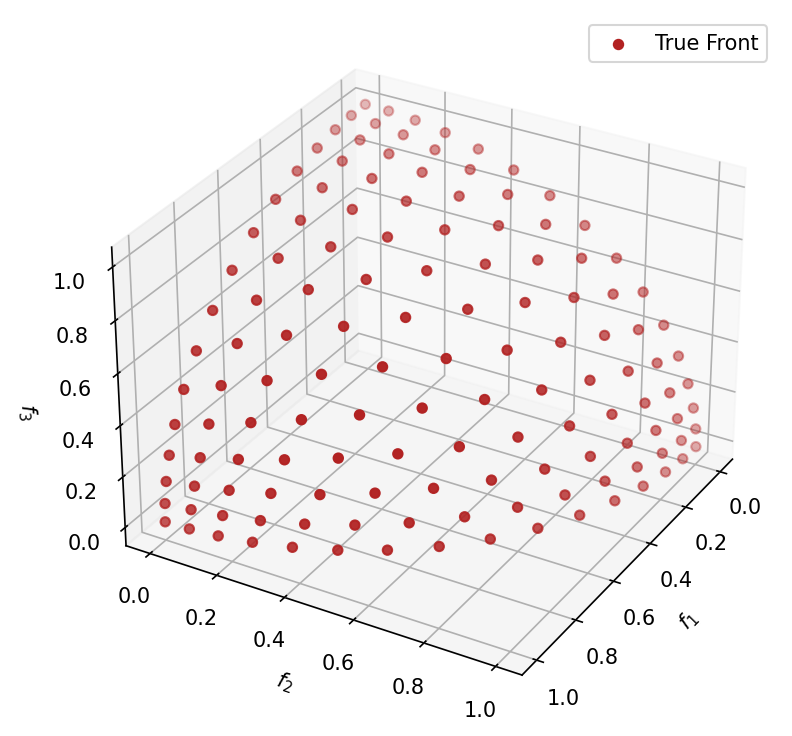

In [3]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})
ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [4]:
NGEN = 250
POPSIZE = 136
SEED = 3

In [5]:
problem.__dict__

{'k': 8,
 'n_var': 10,
 'n_obj': 3,
 'n_constr': 0,
 'data': {'type_var': numpy.float64},
 'xl': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'xu': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'callback': None,
 'check_inconsistencies': True,
 'replace_nan_values_by': inf,
 'exclude_from_serialization': [],
 '_pareto_set': <pymoo.util.cache.Cache at 0x1c40a0dd7c0>,
 '_pareto_front': <pymoo.util.cache.Cache at 0x1c40a0dd760>,
 '_ideal_point': None,
 '_nadir_point': None}

In [6]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=15)

In [7]:
ref_dirs.shape

(136, 3)

In [8]:
#This is the pure python implementation of mnn to compare runtime to cython
from pymoode.misc.mnn import calc_mnn

def calc_mnn_nds(F, n_remove: int=0):
    return calc_mnn(F, n_remove=n_remove, twonn=False)

In [9]:
%%time

gde3 = GDE3(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.2, F=(0.0, 1.0), gamma=1e-4,
            survival=RankAndCrowding(crowding_func=calc_mnn_nds))

res_gde3 = minimize(problem,
                    gde3,
                    ('n_gen', NGEN),
                    seed=SEED,
                    save_history=True,
                    verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.501275985
    2 |     272 |  0.369005108 |  0.487152048
    3 |     408 |  0.322744131 |  0.421242756
    4 |     544 |  0.300374484 |  0.392290394
    5 |     680 |  0.253587497 |  0.368559616
    6 |     816 |  0.230005600 |  0.340441433
    7 |     952 |  0.208614168 |  0.304259260
    8 |    1088 |  0.197443645 |  0.277047147
    9 |    1224 |  0.181894107 |  0.262016408
   10 |    1360 |  0.165423085 |  0.216992428
   11 |    1496 |  0.145686534 |  0.196101386
   12 |    1632 |  0.132301204 |  0.175468247
   13 |    1768 |  0.123522967 |  0.159284221
   14 |    1904 |  0.117830912 |  0.144276920
   15 |    2040 |  0.108827584 |  0.112584959
   16 |    2176 |  0.096437314 |  0.107497872
   17 |    2312 |  0.088071912 |  0.104013025
   18 |    2448 |  0.081260049 |  0.096134451
   19 |    2584 |  0.077262129 |  0.085977192
   20 |    2720 |  0.073946267 |  0.079071297
   21 |    2856 |  0.070738942 |  

In [10]:
%%time

gde3 = GDE3(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.2, F=(0.0, 1.0), gamma=1e-4,
            survival=RankAndCrowding(crowding_func="mnn"))

res_gde3 = minimize(problem,
                    gde3,
                    ('n_gen', NGEN),
                    seed=SEED,
                    save_history=True,
                    verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.501275985
    2 |     272 |  0.369005108 |  0.487152048
    3 |     408 |  0.322744131 |  0.421242756
    4 |     544 |  0.300374484 |  0.392290394
    5 |     680 |  0.253587497 |  0.368559616
    6 |     816 |  0.230005600 |  0.340441433
    7 |     952 |  0.208614168 |  0.304259260
    8 |    1088 |  0.197443645 |  0.277047147
    9 |    1224 |  0.181894107 |  0.262016408
   10 |    1360 |  0.165423085 |  0.216992428
   11 |    1496 |  0.145686534 |  0.196101386
   12 |    1632 |  0.132301204 |  0.175468247
   13 |    1768 |  0.123522967 |  0.159284221
   14 |    1904 |  0.117830912 |  0.144276920
   15 |    2040 |  0.108827584 |  0.112584959
   16 |    2176 |  0.096437314 |  0.107497872
   17 |    2312 |  0.088071912 |  0.104013025
   18 |    2448 |  0.081260049 |  0.096134451
   19 |    2584 |  0.077262129 |  0.085977192
   20 |    2720 |  0.073946267 |  0.079071297
   21 |    2856 |  0.070738942 |  

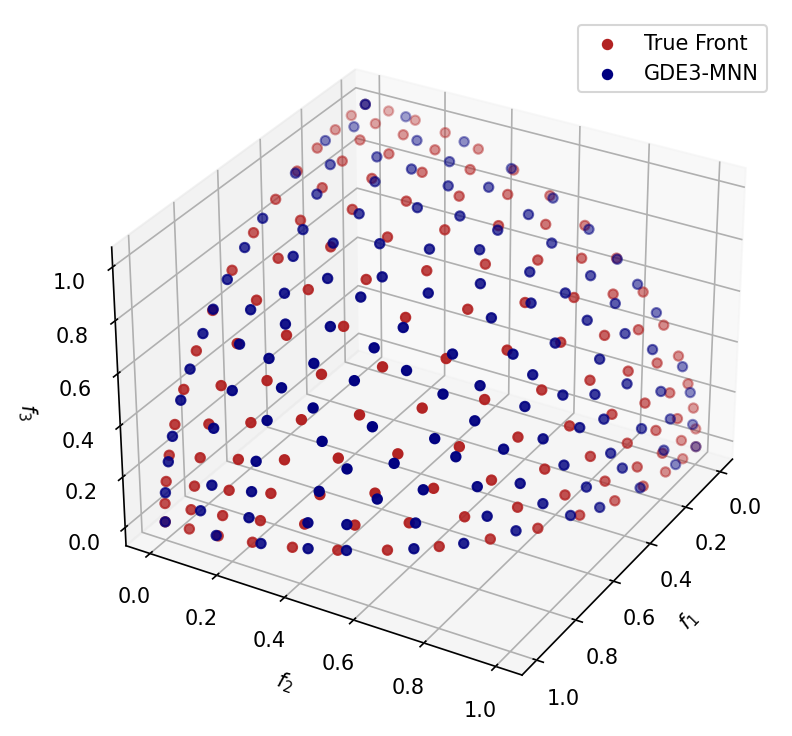

In [11]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], res_gde3.F[:, 2],
        color="navy", label="GDE3-MNN", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [12]:
%%time

nsga3 = NSGA3(pop_size=POPSIZE, ref_dirs=ref_dirs)

res_nsga3 = minimize(problem,
                     nsga3,
                     ('n_gen', NGEN),
                     seed=SEED,
                     save_history=True,
                     verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.393674217 |  0.446761025
    2 |     272 |  0.402516910 |  0.419809947
    3 |     408 |  0.332838890 |  0.399723995
    4 |     544 |  0.341881392 |  0.353695259
    5 |     680 |  0.307222462 |  0.308094079
    6 |     816 |  0.243138514 |  0.282244357
    7 |     952 |  0.218084895 |  0.229831199
    8 |    1088 |  0.195276182 |  0.186005118
    9 |    1224 |  0.184237542 |  0.179413619
   10 |    1360 |  0.154592323 |  0.147852330
   11 |    1496 |  0.141378497 |  0.117015978
   12 |    1632 |  0.128088053 |  0.108300983
   13 |    1768 |  0.117127790 |  0.102611385
   14 |    1904 |  0.109063790 |  0.092386546
   15 |    2040 |  0.102160464 |  0.092971160
   16 |    2176 |  0.094986874 |  0.084390123
   17 |    2312 |  0.087888195 |  0.080145166
   18 |    2448 |  0.084211524 |  0.076998628
   19 |    2584 |  0.079625327 |  0.073335632
   20 |    2720 |  0.077719570 |  0.071362009
   21 |    2856 |  0.072934003 |  

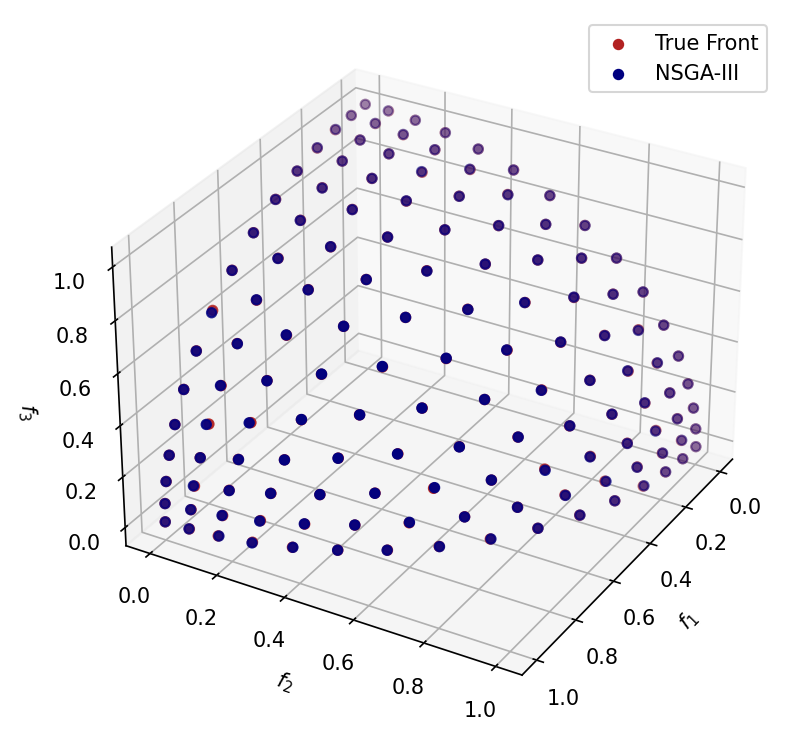

In [13]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsga3.F[:, 0], res_nsga3.F[:, 1], res_nsga3.F[:, 2],
        color="navy", label="NSGA-III", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [14]:
%%time

nsder = NSDER(ref_dirs=ref_dirs, pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 1.0), gamma=1e-4)
    
res_nsder = minimize(problem,
                     nsder,
                     ('n_gen', NGEN),
                     seed=SEED,
                     save_history=True,
                     verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.488790248
    2 |     272 |  0.396262436 |  0.516014751
    3 |     408 |  0.313959571 |  0.459868987
    4 |     544 |  0.278391598 |  0.377125603
    5 |     680 |  0.254458187 |  0.319947642
    6 |     816 |  0.251649791 |  0.318059820
    7 |     952 |  0.202185934 |  0.277925095
    8 |    1088 |  0.199974830 |  0.233034380
    9 |    1224 |  0.187967349 |  0.218655891
   10 |    1360 |  0.171235785 |  0.168226582
   11 |    1496 |  0.175469822 |  0.156416577
   12 |    1632 |  0.140233577 |  0.149915770
   13 |    1768 |  0.134621046 |  0.139799071
   14 |    1904 |  0.115679133 |  0.120596261
   15 |    2040 |  0.104550372 |  0.102670226
   16 |    2176 |  0.095206436 |  0.090891889
   17 |    2312 |  0.087485535 |  0.082753040
   18 |    2448 |  0.085110447 |  0.079300138
   19 |    2584 |  0.080738305 |  0.073952049
   20 |    2720 |  0.076044016 |  0.071317665
   21 |    2856 |  0.071184652 |  

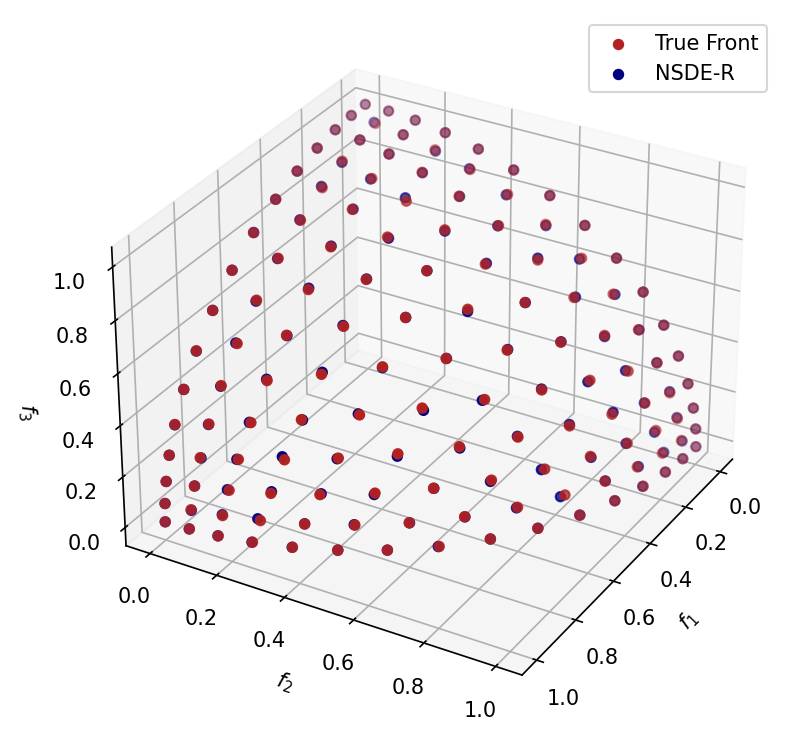

In [15]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsder.F[:, 0], res_nsder.F[:, 1], res_nsder.F[:, 2],
        color="navy", label="NSDE-R", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()